In [12]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
df = pd.read_csv(r'C:\Users\AMIT VASHISTHA\Downloads\monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly_milk_production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    168 non-null    object
 1   Monthly_milk_production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [16]:
df.Month = pd.to_datetime(df.Month)

df = df.set_index("Month")
df.head()

,Monthly_milk_production
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


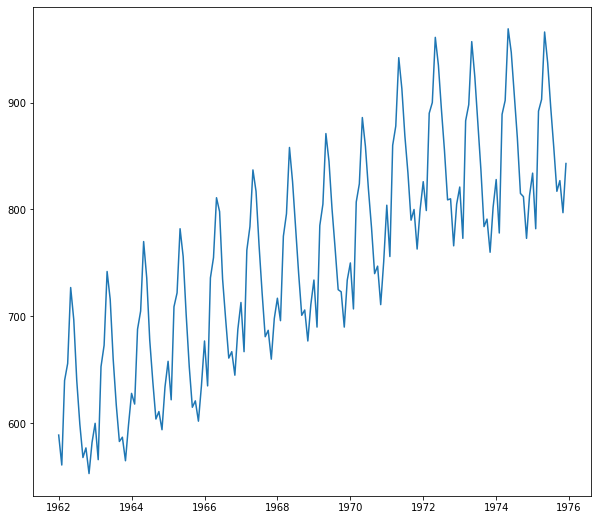

In [26]:
plt.figure(figsize=(10,9))
plt.plot(df.index, df["Monthly_milk_production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

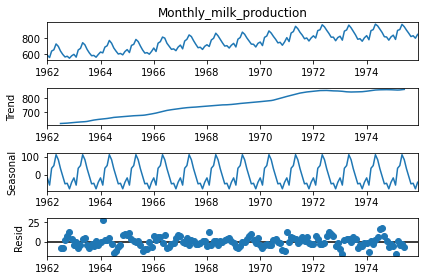

In [18]:
a = seasonal_decompose(df["Monthly_milk_production"], model = "add")
a.plot();

# ARIMA Forecast:


In [28]:
train_data = df[:len(df)-20]
test_data = df[len(df)-20:]
arima_model = SARIMAX(train_data['Monthly_milk_production'], order = (2,1,1), seasonal_order = (4,0,3,20))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly_milk_production   No. Observations:                  148
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 20)   Log Likelihood                -647.781
Date:                                    Sun, 13 Aug 2023   AIC                           1317.562
Time:                                            21:07:50   BIC                           1350.457
Sample:                                        01-01-1962   HQIC                          1330.928
                                             - 04-01-1974                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3895      0.130      3.001      0.003       0.135       0.644
ar.L2          0.1477      0.103      1.439      0.150      -0.053       0.349
ma.L1         -0.8434      0.082    -10.265      0.000      -1.004      -0.682
ar.S.L20       0.7384     55.721      0.013      0.989    -108.472     109.949
ar.S.L40       0.1001     14.086      0.007      0.994     -27.509      27.709
ar.S.L60       0.9326      8.431      0.111      0.912     -15.592      17.457
ar.S.L80      -0.7740     43.545     -0.018      0.986     -86.121      84.573
ma.S.L20      -0.0982     16.089     -0.006      0.995     -31.632      31.436
ma.S.L40      -0.9935    101.368     -0.010      0.992    -199.672     197.685
ma.S.L60       0.1020     10.976      0.009      0.993     -21.410      21.614
sigma2        93.1523   4454.920      0.021      0.983   -8638.330    8824.634
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.33   Prob(JB):                         0.44
Heteroskedasticity (H):               0.91   Skew:                            -0.20
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1974-05-01    951.016506
1974-06-01    933.771089
1974-07-01    889.297021
1974-08-01    852.881088
1974-09-01    808.061700
1974-10-01    800.220900
1974-11-01    768.675662
1974-12-01    801.432287
1975-01-01    811.517140
1975-02-01    775.717990
1975-03-01    873.375607
1975-04-01    893.279651
1975-05-01    942.167478
1975-06-01    910.210201
1975-07-01    884.195137
1975-08-01    865.150973
1975-09-01    816.548768
1975-10-01    840.931412
1975-11-01    794.471775
1975-12-01    822.849654
Freq: MS, Name: ARIMA Predictions, dtype: float64

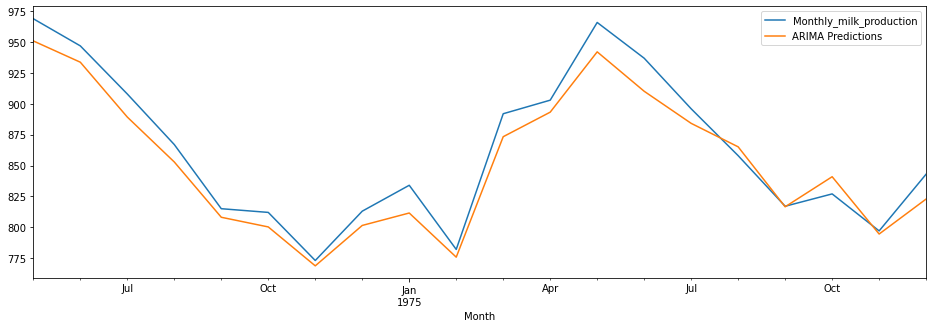

In [30]:
test_data['Monthly_milk_production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [31]:
arima_mape_error = mean_absolute_percentage_error(test_data['Monthly_milk_production'], arima_pred)
arima_rmse_error = rmse(test_data['Monthly_milk_production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly_milk_production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}\nMean Absolute Percentage Error: {arima_mape_error}','%')
     

MSE Error: 222.80700040881513
RMSE Error: 14.926721019996828
Mean: 754.7083333333334
Mean Absolute Percentage Error: 1.4906666438508538 %


# Prophet Forecast

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Monthly_milk_production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [35]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y']

train_data_pr = df_pr.iloc[:len(df)-20]
test_data_pr = df_pr.iloc[len(df)-20:]
     

In [48]:
from prophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=20,freq='MS')
prophet_pred = m.predict(future)

21:15:26 - cmdstanpy - INFO - Chain [1] start processing
21:15:26 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,1975-08-01,847.440931,821.686876,846.928162,838.650425,856.304048,-13.407329,-13.407329,-13.407329,-13.407329,-13.407329,-13.407329,0.0,0.0,0.0,834.033603
164,1975-09-01,847.361028,779.495194,806.797214,837.948656,857.413405,-54.973653,-54.973653,-54.973653,-54.973653,-54.973653,-54.973653,0.0,0.0,0.0,792.387375
165,1975-10-01,847.283702,783.151693,809.771505,836.686900,858.158310,-51.357849,-51.357849,-51.357849,-51.357849,-51.357849,-51.357849,0.0,0.0,0.0,795.925853
166,1975-11-01,847.203799,750.000011,779.386336,835.487660,859.256962,-82.219288,-82.219288,-82.219288,-82.219288,-82.219288,-82.219288,0.0,0.0,0.0,764.984511
167,1975-12-01,847.126473,784.149361,814.443257,834.358870,860.241559,-48.769468,-48.769468,-48.769468,-48.769468,-48.769468,-48.769468,0.0,0.0,0.0,798.357005


In [50]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-20:]['ds'], "Pred" : prophet_pred[-20:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1974-05-01,956.391198
1974-06-01,929.054960
1974-07-01,877.249159
1974-08-01,834.627441
1974-09-01,792.818849
1974-10-01,796.417728
1974-11-01,766.082070
1974-12-01,801.259035
1975-01-01,826.471774


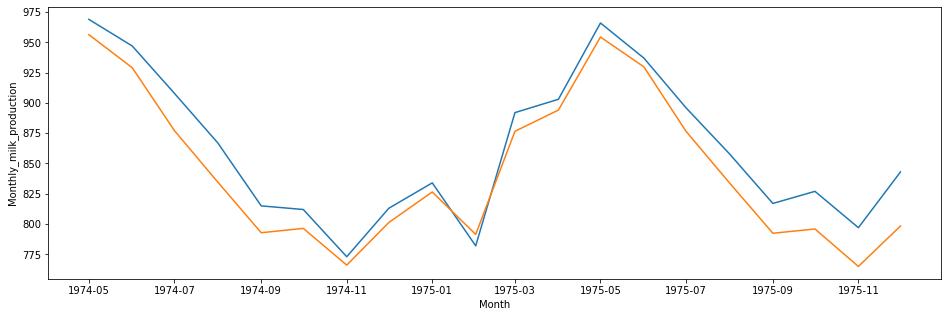

In [51]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly_milk_production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [53]:
prophet_mape_error = mean_absolute_percentage_error(test_data['Monthly_milk_production'], test_data["Prophet_Predictions"])
prophet_rmse_error = rmse(test_data['Monthly_milk_production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly_milk_production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}\nMean Absolute Percentage Error: {prophet_mape_error}','%')
 

MSE Error: 479.1688768495303
RMSE Error: 21.889926378348793
Mean: 754.7083333333334
Mean Absolute Percentage Error: 2.2565074054193786 %


# Holt-Winter Forecast

In [54]:
train_data = df[:len(df)-20]
test_data = df[len(df)-20:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing
holt_winter_model = ExponentialSmoothing(train_data['Monthly_milk_production'],trend='mul',seasonal='mul',seasonal_periods=12)
holt_winter_result = holt_winter_model.fit()
holt_winter_result.summary()

Dep. Variable:,Monthly_milk_production,No. Observations:,148
Model:,ExponentialSmoothing,SSE,8613.270
Optimized:,True,AIC,633.449
Trend:,Multiplicative,BIC,681.405
Seasonal:,Multiplicative,AICC,638.752
Seasonal Periods:,12,Date:,"Sun, 13 Aug 2023"
Box-Cox:,False,Time:,21:19:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,1.5532e-08,beta,True


In [55]:
holt_winter_pred = holt_winter_result.predict(start = len(train_data), end = len(df)-1).rename("HOLT WINTER Predictions")
holt_winter_pred

1974-05-01    972.815010
1974-06-01    942.128063
1974-07-01    886.407811
1974-08-01    840.159932
1974-09-01    794.051394
1974-10-01    800.227595
1974-11-01    766.991671
1974-12-01    810.195114
1975-01-01    840.325640
1975-02-01    797.177944
1975-03-01    905.512879
1975-04-01    924.970380
1975-05-01    997.588768
1975-06-01    966.120347
1975-07-01    908.981120
1975-08-01    861.555490
1975-09-01    814.272749
1975-10-01    820.606233
1975-11-01    786.523922
1975-12-01    830.827586
Freq: MS, Name: HOLT WINTER Predictions, dtype: float64

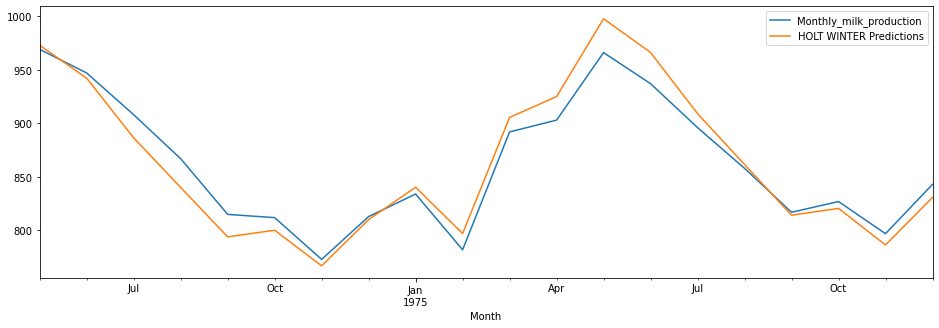

In [57]:
test_data['Monthly_milk_production'].plot(figsize = (16,5), legend=True)
holt_winter_pred.plot(legend = True);

In [59]:
holt_winter_mape_error = mean_absolute_percentage_error(test_data['Monthly_milk_production'], holt_winter_pred)
holt_winter_rmse_error = rmse(test_data['Monthly_milk_production'], holt_winter_pred)
holt_winter_mse_error = holt_winter_rmse_error**2
mean_value = df['Monthly_milk_production'].mean()

print(f'MSE Error: {holt_winter_mse_error}\nRMSE Error: {holt_winter_rmse_error}\nMean: {mean_value}\nMean Absolute Percentage Error: {holt_winter_mape_error}','%')


MSE Error: 255.76059848533043
RMSE Error: 15.992516952791716
Mean: 754.7083333333334
Mean Absolute Percentage Error: 1.513903581676971 %


In [60]:
test_data['HOLT_WINTER_Predictions'] = holt_winter_pred

# Comparitive Analysis of above 3 methods:

In [62]:
rmse_errors = [arima_rmse_error, holt_winter_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, holt_winter_mse_error, prophet_mse_error]
mape_errors = [arima_mape_error, holt_winter_mape_error, prophet_mape_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "HOLT WINTER", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors, "MAPE Errors" : mape_errors})

test_data['ARIMA_Predictions'] = arima_pred
test_data['HOLT_WINTER_Predictions'] = holt_winter_pred
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

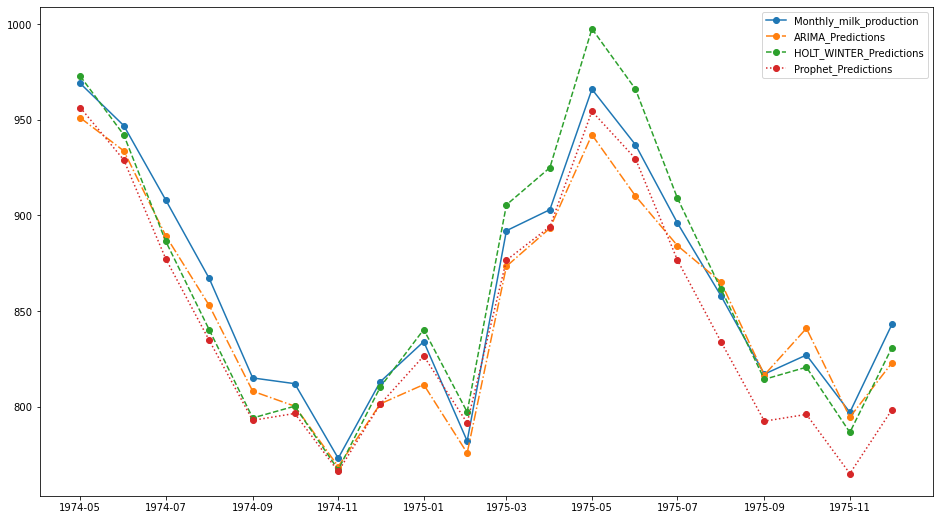

In [64]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly_milk_production"], linestyle="-", label='Monthly_milk_production')
plt.plot_date(test_data.index, test_data['ARIMA_Predictions'], linestyle="-.", label='ARIMA_Predictions')
plt.plot_date(test_data.index, test_data['HOLT_WINTER_Predictions'] , linestyle="--", label='HOLT_WINTER_Predictions')
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":", label='Prophet_Predictions')
plt.legend()
plt.show()

In [66]:
print(f"Mean: {test_data['Monthly_milk_production'].mean()}")
errors

Mean: 862.8


,Models,RMSE Errors,MSE Errors,MAPE Errors
0,ARIMA,14.926721,222.807000,1.490667
1,HOLT WINTER,15.992517,255.760598,1.513904
2,Prophet,21.889926,479.168877,2.256507
